## Let's Dig In

### Map
We start with a 7x7 map that contains barriers and enemies that, if touched, will do damage to the user. If the user tries to go off out of the 7x7 map, then they will take damage as well.

### Rules
The purpose of this game is to manuever around the barriers and enemies to get the treasure. The treasure is always located in the bottom rightmost square. We start the user in a randomly determined location on the map. 

*(This is so a machine learning model cannot figure out a path to do every time)*

### Machine Learning
For this we are using a reinforcement deep learning. Let's see how things go. We are going to have our model start playing games where it decides what direction to go without us telling it where to go or what the objective is. We are then going to give feedback based on those moves. If it tries to leave the map, we let it know that it took damage and lost. If it finds the treasure, we are going to tell it that it won. This feedback will be feed to our model many many times. The only way our model learns is by this feedback. Once our model has 100% win-rate, we will end the training.

In [1]:
import sys
sys.path.insert(0, '../')

import maze_solver as ms

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Epoch: 000/14999 | Loss: 0.0303 | Episodes: 105 | Win count: 0 | Win rate: 0.000 | time: 4.3 seconds
Epoch: 001/14999 | Loss: 0.0037 | Episodes: 107 | Win count: 0 | Win rate: 0.000 | time: 8.6 seconds
Epoch: 002/14999 | Loss: 0.0026 | Episodes: 102 | Win count: 0 | Win rate: 0.000 | time: 12.9 seconds
Epoch: 003/14999 | Loss: 0.0010 | Episodes: 101 | Win count: 0 | Win rate: 0.000 | time: 17.0 seconds
Epoch: 004/14999 | Loss: 0.0026 | Episodes: 104 | Win count: 0 | Win rate: 0.000 | time: 21.2 seconds
Epoch: 005/14999 | Loss: 0.0041 | Episodes: 28 | Win count: 1 | Win rate: 0.000 | time: 22.4 seconds
Epoch: 006/14999 | Loss: 0.0017 | Episodes: 105 | Win count: 1 | Win rate: 0.000 | time: 26.6 seconds
Epoch: 007/14999 | Loss: 0.0042 | Episodes: 11 | Win count: 2 | Win rate: 0.000 | time: 27.1 seconds
Epoch: 008/14999 | Loss: 0.0239 | Episodes: 1 | Win count: 3 | Win rate: 0.000 | time: 27.1 seconds
Epoch: 009/14999 | Loss: 0.0387 | Episodes: 18 | Win count: 4 | Win rate: 0.000 | time: 

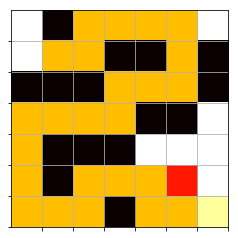

In [2]:
ms.solve()

### After thoughts
After 45 epoch's, it seems that our ML model has figured out our game. As you can see, it started at (1, 1) and it's path is denoted by the orange tiles. Again, the starting position is always randomly determined. It then navigated through the barriers (black), avoided the enemy (red), and successfully made it to the treasure (yellow). Neat!


Although we only had a 7x7 map with 1 enemy, it is easy to see that this can be replicated at a much larger scale. With the same rules, and same goal, our reinforcement ML model will be able to solve any map with enough training.